In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2024-12-08 13:26:46.060767: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-08 13:26:46.750170: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
category = 'medium'
train_data = tf.data.Dataset.load(f'data/baby_train_{category}')
val_data = tf.data.Dataset.load(f'data/baby_valid_{category}')
train_data = train_data.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

2024-12-08 13:26:51.227110: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 5800524672884809497
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.Distribut

[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 5800524672884809497
2024-12-08 13:26:51.456784: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


tf.Tensor(b'Sculpture', shape=(), dtype=string)


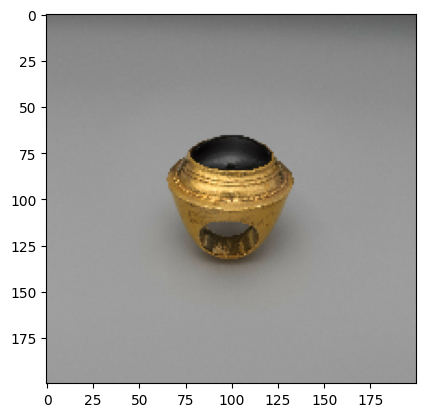

In [3]:
for image, label in train_data.take(1):
    print(label)
    plt.imshow(image)
    break

# Preliminary model

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#load data
print("Loading data...")
category = 'medium'
train_data = tf.data.Dataset.load(f'data/baby_train_{category}')
val_data = tf.data.Dataset.load(f'data/baby_valid_{category}')

#hyperparameters
IMG_SIZE = 200
BATCH_SIZE = 32
NUM_CLASSES = 3
CLASSES = ['Painting', 'Sculpture', 'Architecture']
EPOCHS = 10

def encode_label(label):#decoding as it had issues passes images
    label_str = label.numpy().decode('utf-8')
    return CLASSES.index(label_str)

def preprocess(image, label):
    #swap grayscale to rgb
    image = tf.cast(image, tf.float32)
    if tf.shape(image)[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    image = image / 255.0
    
    #labeling
    label_idx = tf.py_function(func=encode_label, inp=[label], Tout=tf.int32)
    label_idx = tf.reshape(label_idx, ())
    return image, label_idx

#now actually creating the datasets, shuffle etc as the codeathon1, and our tempalte
print("Creating datasets...")
def create_dataset(data):
    return (data
            .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
            .cache()
            .shuffle(1000)
            .batch(BATCH_SIZE)
            .prefetch(tf.data.AUTOTUNE))

train_ds = create_dataset(train_data)
val_ds = create_dataset(val_data)

#modeling
print("Creating model...")
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))#had to pass imgsize here from the stored vaiable, instead of 200x200x3
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(NUM_CLASSES)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Loading data...
Creating datasets...
Creating model...


[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 5800524672884809497
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 15839417982639371443


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928 

Loading data...
Creating datasets...
Creating model...

Starting training...

Epoch 1/10


I0000 00:00:1732199786.536346  367700 cuda_dnn.cc:529] Loaded cuDNN version 90300


Step 0: Loss = 1.0987


2024-11-21 09:36:31.349312: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training accuracy: 0.2900


2024-11-21 09:36:31.863664: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation accuracy: 0.3000

Epoch 2/10
Step 0: Loss = 1.0953
Training accuracy: 0.4200
Validation accuracy: 0.3000

Epoch 3/10
Step 0: Loss = 1.0811
Training accuracy: 0.4200


2024-11-21 09:36:32.296869: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-11-21 09:36:32.491865: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation accuracy: 0.3000

Epoch 4/10
Step 0: Loss = 1.0663
Training accuracy: 0.4200
Validation accuracy: 0.3000

Epoch 5/10
Step 0: Loss = 1.0569
Training accuracy: 0.4200
Validation accuracy: 0.3000

Epoch 6/10
Step 0: Loss = 1.1069
Training accuracy: 0.4200
Validation accuracy: 0.3000

Epoch 7/10
Step 0: Loss = 1.0909
Training accuracy: 0.4200
Validation accuracy: 0.3000

Epoch 8/10
Step 0: Loss = 1.0439
Training accuracy: 0.4200
Validation accuracy: 0.3000

Epoch 9/10
Step 0: Loss = 1.0661
Training accuracy: 0.4200
Validation accuracy: 0.3000

Epoch 10/10
Step 0: Loss = 1.1024


2024-11-21 09:36:32.701458: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training accuracy: 0.4200
Validation accuracy: 0.3000


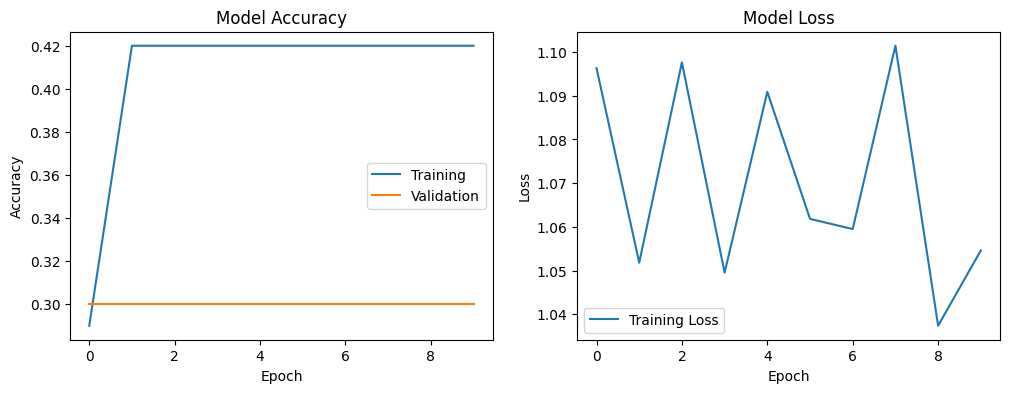

In [4]:
#loss and optimizer function, stringed from previous hw here
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()


@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    
    train_acc_metric.update_state(labels, predictions)
    return loss

#val with claude
@tf.function
def val_step(images, labels):
    predictions = model(images, training=False)
    val_acc_metric.update_state(labels, predictions)


history = {
    'loss': [],
    'accuracy': [],
    'val_accuracy': []
}

print("\nStarting training...")
try:
    #training loop
    for epoch in range(EPOCHS):
        print(f"\nEpoch {epoch+1}/{EPOCHS}")
        
        #training
        epoch_loss = []
        for step, (images, labels) in enumerate(train_ds):
            loss = train_step(images, labels)
            epoch_loss.append(float(loss))
            
            if step % 10 == 0:
                print(f"Step {step}: Loss = {float(loss):.4f}")
        
        #calc acc
        train_acc = train_acc_metric.result()
        print(f"Training accuracy: {float(train_acc):.4f}")
        
        #val
        for images, labels in val_ds:
            val_step(images, labels)
        val_acc = val_acc_metric.result()
        print(f"Validation accuracy: {float(val_acc):.4f}")
        
        #mets
        history['loss'].append(np.mean(epoch_loss))
        history['accuracy'].append(float(train_acc))
        history['val_accuracy'].append(float(val_acc))
        
        #the reset metrics had to be swapped to state, like the issue we had with hw previously 
        train_acc_metric.reset_state()
        val_acc_metric.reset_state()
    
    #plotting
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training')
    plt.plot(history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()
#exception catch for troubleshooting
except Exception as e:
    print("\nError during training:", str(e))
    print("\nDiagnostic information:")
    for images, labels in train_ds.take(1):
        print("Images shape:", images.shape)
        print("Labels shape:", labels.shape)
        print("Images dtype:", images.dtype)
        print("Labels dtype:", labels.dtype)
        print("Sample image values range:", tf.reduce_min(images).numpy(), "to", tf.reduce_max(images).numpy())
        print("Unique labels:", tf.unique(labels)[0].numpy())

#pred function
@tf.function
def predict(image):
    image = tf.cast(image, tf.float32)
    if tf.shape(image)[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    image = image / 255.0
    image = tf.expand_dims(image, 0)
    predictions = model(image, training=False)
    return tf.argmax(predictions[0])

# Improved Model pt1

Loading data...
Creating datasets...
Creating model...

Starting training...

Epoch 1/20


/home/bjs6pj/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
E0000 00:00:1732199794.567635  367474 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape infunctional_1_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Step 0: Loss = 2.3945
Training accuracy: 0.4800
Validation accuracy: 0.3000

Epoch 2/20
Step 0: Loss = 1.1042
Training accuracy: 0.5800
Validation accuracy: 0.3000

Epoch 3/20
Step 0: Loss = 0.8293
Training accuracy: 0.5800
Validation accuracy: 0.3000

Epoch 4/20
Step 0: Loss = 0.4590
Training accuracy: 0.7500
Validation accuracy: 0.3000

Epoch 5/20
Step 0: Loss = 0.3454
Training accuracy: 0.8000
Validation accuracy: 0.3000

Epoch 6/20
Step 0: Loss = 0.8689
Training accuracy: 0.7900
Validation accuracy: 0.3000

Early stopping triggered after 6 epochs


2024-11-21 09:36:40.910019: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


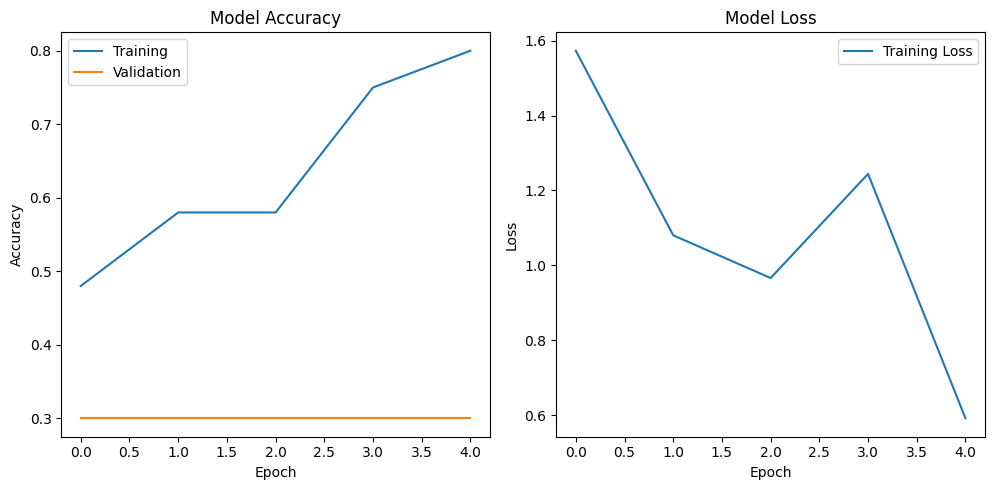

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#load data
print("Loading data...")
category = 'medium'
train_data = tf.data.Dataset.load(f'data/baby_train_{category}')#we are using the baby data, SMALLER so be aware for trend in validation results
val_data = tf.data.Dataset.load(f'data/baby_valid_{category}')

#hypterparameters
IMG_SIZE = 200
BATCH_SIZE = 32
NUM_CLASSES = 3
CLASSES = ['Painting', 'Sculpture', 'Architecture']
EPOCHS = 20  

#data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.2),
])

def encode_label(label):
    label_str = label.numpy().decode('utf-8')
    return CLASSES.index(label_str)

def preprocess(image, label):
    #image processing
    image = tf.cast(image, tf.float32)
    if tf.shape(image)[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    image = image / 255.0
    
    
    label_idx = tf.py_function(func=encode_label, inp=[label], Tout=tf.int32)
    label_idx = tf.reshape(label_idx, ())
    return image, label_idx


print("Creating datasets...")
def create_dataset(data, is_training=False):
    ds = (data
          .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
          .cache()
          .shuffle(1000 if is_training else 100)
          .batch(BATCH_SIZE)
          .prefetch(tf.data.AUTOTUNE))
    return ds

train_ds = create_dataset(train_data, is_training=True)
val_ds = create_dataset(val_data)

#architecture update
print("Creating model...")
def create_improved_model():
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    #1st block
    x = layers.Conv2D(32, 3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.2)(x)
    
    #2nd
    x = layers.Conv2D(64, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.3)(x)
    
    #3rd block
    x = layers.Conv2D(128, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.4)(x)
    
    #4th block
    x = layers.Conv2D(256, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.5)(x)
    
    #global average/pooling
    x = layers.GlobalAveragePooling2D()(x)
    
    #dense
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    
    #softmax
    outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)

model = create_improved_model()


#LR
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

#gradient
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    
    gradients = tape.gradient(loss, model.trainable_weights)
    #clipping
    gradients, _ = tf.clip_by_global_norm(gradients, clip_norm=1.0)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    
    train_acc_metric.update_state(labels, predictions)
    return loss

#val function
@tf.function
def val_step(images, labels):
    predictions = model(images, training=False)
    val_acc_metric.update_state(labels, predictions)

#training
history = {
    'loss': [],
    'accuracy': [],
    'val_accuracy': []
}

#early stopping
best_val_acc = 0
patience = 5
patience_counter = 0

print("\nStarting training...")
try:
    for epoch in range(EPOCHS):
        print(f"\nEpoch {epoch+1}/{EPOCHS}")
        
        #train
        epoch_loss = []
        for step, (images, labels) in enumerate(train_ds):
            loss = train_step(images, labels)
            epoch_loss.append(float(loss))
            
            if step % 5 == 0:  # More frequent updates
                print(f"Step {step}: Loss = {float(loss):.4f}")
        
        train_acc = train_acc_metric.result()
        print(f"Training accuracy: {float(train_acc):.4f}")
        
        
        for images, labels in val_ds:
            val_step(images, labels)
        val_acc = val_acc_metric.result()
        print(f"Validation accuracy: {float(val_acc):.4f}")
        
        #check here for troubleshooting
        if float(val_acc) > best_val_acc:
            best_val_acc = float(val_acc)
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f"\nEarly stopping triggered after {epoch+1} epochs")
            break
        
        
        history['loss'].append(np.mean(epoch_loss))
        history['accuracy'].append(float(train_acc))
        history['val_accuracy'].append(float(val_acc))
        
        #reset
        train_acc_metric.reset_state()
        val_acc_metric.reset_state()
    
    #plotting
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(history['accuracy'], label='Training')
    plt.plot(history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("\nError during training:", str(e))
    print("\nDiagnostic information:")
    for images, labels in train_ds.take(1):
        print("Images shape:", images.shape)
        print("Labels shape:", labels.shape)
        print("Images dtype:", images.dtype)
        print("Labels dtype:", labels.dtype)
        print("Sample image values range:", tf.reduce_min(images).numpy(), 
              "to", tf.reduce_max(images).numpy())
        print("Unique labels:", tf.unique(labels)[0].numpy())

#function
@tf.function
def predict(image):
    image = tf.cast(image, tf.float32)
    if tf.shape(image)[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    image = image / 255.0
    image = tf.expand_dims(image, 0)
    predictions = model(image, training=False)
    probabilities = tf.nn.softmax(predictions[0])
    class_idx = tf.argmax(probabilities)
    confidence = tf.reduce_max(probabilities)
    return CLASSES[int(class_idx)], float(confidence)

## Notes
Data Augmentation: Adding data augmentation to allow for more varied data to be available, so overfitting to one kind of image doesnt occur.

Conv Blocks with Increased Filters: Each convolutional block has incrementally more filters (32, 64, 128, and 256) to capture increasing levels of detail.

Dropout After Each Block: Dropout rates increase after each block (0.2, 0.3, 0.4, 0.5) to progressively reduce overfitting.

Global Average Pooling: Simplifies the model while retaining spatial information from the features.

Early Stopping: Makes sure the model doesn't over train and stops while the training validation is high.

Adam optimizer: I tried several optimizers, including SGD, and Adam was the best by far.

Final Dense Layer: Adds a dense layer with a dropout before the output to help reduce overfitting.

Output with Softmax Activation: Provides class probabilities for multi-class classification.

All of these changes from what alexandra had originally built allow for the training accuracy to go up tremendously (note for becky we expect the validation accuracy to go up as well because of the dropout reducing overfitting but it seems like there is something wrong with the data loading so we arent seeing changes in results at the moment). We can see that each of these changes impat a different part of improving the model, but one consistency across them is to stop overfitting which is a big issue for the image data that we have because if we wanted this model to be generalizable for all type of paintings, sculptures, and architecture, we want to make sure the model does not overfit to this data.

# Improved Model pt2: Transfer Learning

## Resnet50

Loading data...
Sample data structure: <class 'tuple'>
Sample shapes: [<tf.Tensor: shape=(3,), dtype=int32, numpy=array([200, 200,   3], dtype=int32)>, <tf.Tensor: shape=(0,), dtype=int32, numpy=array([], dtype=int32)>]
Dataset verification - Images shape: (32, 224, 224, 3), Labels shape: (32,)


2024-11-21 09:36:41.720436: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Dataset verification - Images shape: (32, 224, 224, 3), Labels shape: (32,)
Creating model with transfer learning...


2024-11-21 09:36:42.023748: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Starting training...

Epoch 1/20
Step 0: Loss = 1.6551
Step 5: Loss = 2.1954
Step 10: Loss = 1.7612
Step 15: Loss = 1.3604
Step 20: Loss = 1.3649
Step 25: Loss = 1.7226
Step 30: Loss = 1.5623
Step 35: Loss = 1.5752
Step 40: Loss = 1.8423
Step 45: Loss = 1.5642
Step 50: Loss = 1.1745
Step 55: Loss = 1.4088
Step 60: Loss = 1.1838
Step 65: Loss = 1.5203
Step 70: Loss = 1.3127
Step 75: Loss = 1.4952
Step 80: Loss = 1.3409
Step 85: Loss = 1.0773
Step 90: Loss = 0.9470
Step 95: Loss = 1.4019
Training accuracy: 0.3636
Validation accuracy: 0.4721

Epoch 2/20
Step 0: Loss = 1.1840
Step 5: Loss = 1.3195
Step 10: Loss = 1.1609
Step 15: Loss = 1.3927
Step 20: Loss = 1.4639
Step 25: Loss = 1.4433
Step 30: Loss = 1.1899
Step 35: Loss = 1.0975
Step 40: Loss = 1.3702
Step 45: Loss = 1.6613
Step 50: Loss = 1.3447
Step 55: Loss = 1.2185
Step 60: Loss = 1.2812
Step 65: Loss = 1.5679
Step 70: Loss = 1.3309
Step 75: Loss = 1.0363
Step 80: Loss = 1.2413
St

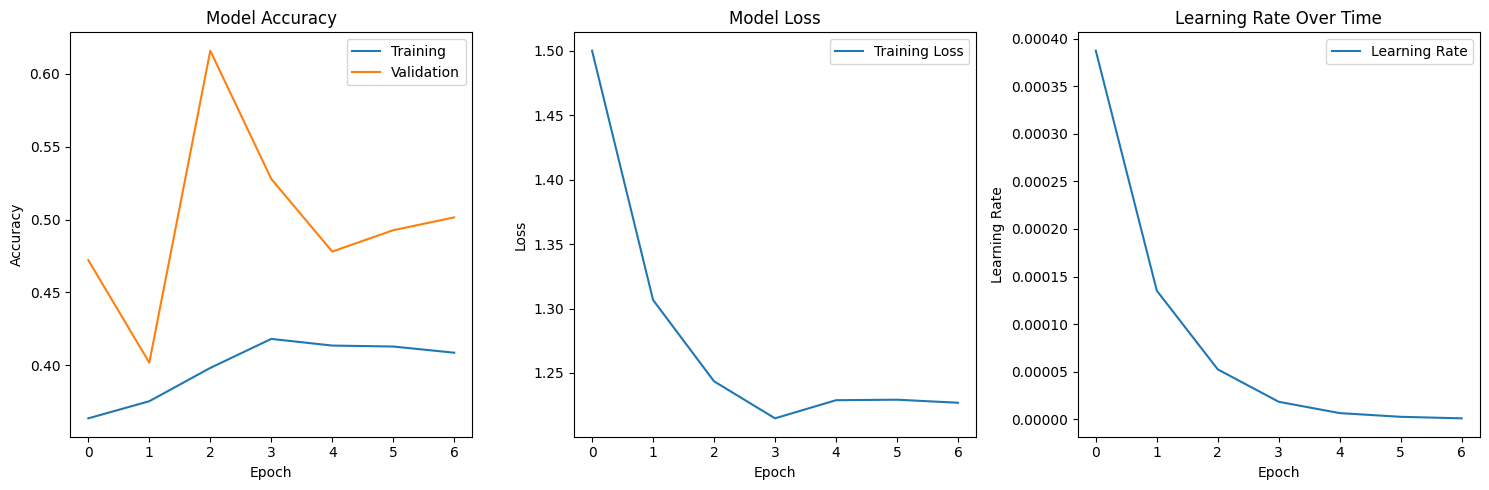

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


#hyperparameters
IMG_SIZE = 224  
BATCH_SIZE = 32
NUM_CLASSES = 3
CLASSES = ['Painting', 'Sculpture', 'Architecture']
EPOCHS = 20

#data aug
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.4),
    layers.RandomContrast(0.4),
    layers.RandomTranslation(0.2, 0.2),
])

def encode_label(label):
    label_str = label.numpy().decode('utf-8')
    return CLASSES.index(label_str)

def preprocess(image, label):
    """Modified preprocessing function with explicit shape handling"""
    #shaping
    image = tf.ensure_shape(image, [None, None, None])
    
    #conversion
    image = tf.cast(image, tf.float32)
    
    #grayscale
    if tf.shape(image)[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    
    #resizing
    image = tf.image.resize_with_pad(image, IMG_SIZE, IMG_SIZE)
    
    #process
    label_idx = tf.py_function(func=encode_label, inp=[label], Tout=tf.int32)
    label_idx = tf.reshape(label_idx, ())
    
    #had to do shaping here because we ran into issues otherwise
    image.set_shape([IMG_SIZE, IMG_SIZE, 3])
    label_idx.set_shape(())
    
    return image, label_idx

def create_dataset(data, is_training=False):
    """Modified dataset creation with error handling"""
    try:
        ds = (data
              .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
              .cache()
              .shuffle(1000 if is_training else 100)
              .batch(BATCH_SIZE)
              .prefetch(tf.data.AUTOTUNE))
        
        
        for images, labels in ds.take(1):
            print(f"Dataset verification - Images shape: {images.shape}, Labels shape: {labels.shape}")
        
        return ds
    
    except Exception as e:
        print(f"Error creating dataset: {str(e)}")
        print("\nDiagnostic information:")
        for sample in data.take(1):
            if isinstance(sample, tuple):
                print("Sample structure:", [tf.shape(x) for x in sample])
            else:
                print("Sample structure:", tf.shape(sample))
        raise

def create_transfer_model():
    """Create model with transfer learning using ResNet50"""
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    
    
    base_model.trainable = False
    
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = data_augmentation(inputs)
    x = tf.keras.applications.resnet50.preprocess_input(x)
    x = base_model(x, training=False)
    
    #classification layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(NUM_CLASSES)(x)
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)

#prep data
print("Loading data...")
try:
    category = 'medium'
    train_data = tf.data.Dataset.load(f'data/train_{category}')
    val_data = tf.data.Dataset.load(f'data/valid_{category}')
    
    for sample in train_data.take(1):
        print("Sample data structure:", type(sample))
        if isinstance(sample, tuple):
            print("Sample shapes:", [tf.shape(x) for x in sample])
    
    train_ds = create_dataset(train_data, is_training=True)
    val_ds = create_dataset(val_data)
    
except Exception as e:
    print(f"Error loading data: {str(e)}")
    raise

#transfer model
print("Creating model with transfer learning...")
model = create_transfer_model()

#LR
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10,
    decay_rate=0.9,
    staircase=True
)

#loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    
    gradients = tape.gradient(loss, model.trainable_weights)
    gradients, _ = tf.clip_by_global_norm(gradients, clip_norm=1.0)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    
    train_acc_metric.update_state(labels, predictions)
    return loss

@tf.function
def val_step(images, labels):
    predictions = model(images, training=False)
    val_acc_metric.update_state(labels, predictions)

def unfreeze_model():
    """Unfreeze layers for fine-tuning"""
    print("Fine-tuning model...")
    base_model = model.layers[3]  
    base_model.trainable = True
    
    for layer in base_model.layers[:-30]:
        layer.trainable = False
    
    #LR
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-5),
        loss=loss_fn,
        metrics=['accuracy']
    )



#history
history = {
    'loss': [],
    'accuracy': [],
    'val_accuracy': [],
    'learning_rates': []
}


print("\nStarting training...")
try:
    best_val_acc = 0
    patience = 5
    patience_counter = 0
    step_counter = 0
    
    for epoch in range(EPOCHS):
        print(f"\nEpoch {epoch+1}/{EPOCHS}")
        
        
        epoch_loss = []
        for step, (images, labels) in enumerate(train_ds):
            loss = train_step(images, labels)
            epoch_loss.append(float(loss))
            
            if step % 5 == 0:
                print(f"Step {step}: Loss = {float(loss):.4f}")
            step_counter += 1
        
        #calc mets
        train_acc = train_acc_metric.result()
        print(f"Training accuracy: {float(train_acc):.4f}")
        
        #val
        for images, labels in val_ds:
            val_step(images, labels)
        val_acc = val_acc_metric.result()
        print(f"Validation accuracy: {float(val_acc):.4f}")
        
        #LR
        current_lr = lr_schedule(step_counter)
        
        #early stopping
        if float(val_acc) > best_val_acc:
            best_val_acc = float(val_acc)
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f"\nEarly stopping triggered after {epoch+1} epochs")
            break
        
        #metrics
        history['loss'].append(np.mean(epoch_loss))
        history['accuracy'].append(float(train_acc))
        history['val_accuracy'].append(float(val_acc))
        history['learning_rates'].append(float(current_lr))
        
        #reset
        train_acc_metric.reset_state()
        val_acc_metric.reset_state()
        
        #tuning
        if epoch == 10 and best_val_acc > 0.7:  
            unfreeze_model()
    
    
    plt.figure(figsize=(15, 5))
    
    #plotting
    plt.subplot(1, 3, 1)
    plt.plot(history['accuracy'], label='Training')
    plt.plot(history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    
    plt.subplot(1, 3, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    
    plt.subplot(1, 3, 3)
    plt.plot(history['learning_rates'], label='Learning Rate')
    plt.title('Learning Rate Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("\nError during training:", str(e))
    print("\nDiagnostic information:")
    for images, labels in train_ds.take(1):
        print("Images shape:", images.shape)
        print("Labels shape:", labels.shape)
        print("Images dtype:", images.dtype)
        print("Labels dtype:", labels.dtype)
        print("Sample image values range:", tf.reduce_min(images).numpy(), 
              "to", tf.reduce_max(images).numpy())
        print("Unique labels:", tf.unique(labels)[0].numpy())
#pred function
@tf.function
def predict(image):
    """Predict function with proper preprocessing"""
    image = tf.cast(image, tf.float32)
    if tf.shape(image)[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    image = tf.image.resize_with_pad(image, IMG_SIZE, IMG_SIZE)
    image = tf.expand_dims(image, 0)
    image = tf.keras.applications.resnet50.preprocess_input(image)
    
    predictions = model(image, training=False)
    probabilities = tf.nn.softmax(predictions[0])
    class_idx = tf.argmax(probabilities)
    confidence = tf.reduce_max(probabilities)
    return CLASSES[int(class_idx)], float(confidence)

# Improved Model pt3: Advanced Architectures

## Squeeze and Excitation Block

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

#hyperparameters
IMG_SIZE = 224  
BATCH_SIZE = 32
NUM_CLASSES = 3
CLASSES = ['Painting', 'Sculpture', 'Architecture']
EPOCHS = 20

#data aug
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.4),
    layers.RandomContrast(0.4),
    layers.RandomTranslation(0.2, 0.2),
])

def encode_label(label):
    label_str = label.numpy().decode('utf-8')
    return CLASSES.index(label_str)

def preprocess(image, label):
    image = tf.ensure_shape(image, [None, None, None])
    image = tf.cast(image, tf.float32)
    if tf.shape(image)[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    image = tf.image.resize_with_pad(image, IMG_SIZE, IMG_SIZE)
    label_idx = tf.py_function(func=encode_label, inp=[label], Tout=tf.int32)
    label_idx = tf.reshape(label_idx, ())
    image.set_shape([IMG_SIZE, IMG_SIZE, 3])
    label_idx.set_shape(())
    return image, label_idx

def create_dataset(data, is_training=False):
    try:
        ds = (data
              .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
              .cache()
              .shuffle(1000 if is_training else 100)
              .batch(BATCH_SIZE)
              .prefetch(tf.data.AUTOTUNE))
        for images, labels in ds.take(1):
            print(f"Dataset verification - Images shape: {images.shape}, Labels shape: {labels.shape}")
        return ds
    except Exception as e:
        print(f"Error creating dataset: {str(e)}")
        raise

#SE Block
def squeeze_excitation_block(input_tensor, ratio=16):
    """Squeeze-and-Excitation Block."""
    filters = input_tensor.shape[-1]
    se_shape = (1, 1, filters)
    
    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Reshape(se_shape)(se)
    se = layers.Dense(filters // ratio, activation='relu', kernel_initializer='he_normal')(se)
    se = layers.Dense(filters, activation='sigmoid', kernel_initializer='he_normal')(se)
    return layers.multiply([input_tensor, se])

#SE backbone
def create_senet_model(input_shape=(224, 224, 3), num_classes=3):
    """Custom SENet model using a ResNet50 backbone."""
    base_model = tf.keras.applications.ResNet50(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'  
    )
    base_model.trainable = False  

    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs)  
    x = base_model(x, training=False)  

    x = squeeze_excitation_block(x)

    #pooling
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes)(x)

    return tf.keras.Model(inputs=inputs, outputs=outputs)

#load data through
print("Loading data...")
try:
    category = 'medium'
    train_data = tf.data.Dataset.load(f'data/train_{category}')
    val_data = tf.data.Dataset.load(f'data/valid_{category}')
    train_ds = create_dataset(train_data, is_training=True)
    val_ds = create_dataset(val_data)
except Exception as e:
    print(f"Error loading data: {str(e)}")
    raise

#SE model
print("Creating SENet model...")
model = create_senet_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=NUM_CLASSES)

#compile
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10,
    decay_rate=0.9,
    staircase=True
)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

#training
print("\nStarting training...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)



# #fine tuning
# print("\nFine-tuning the base model...")
# base_model = model.layers[2]  
# base_model.trainable = True  

# #feezing
# for layer in base_model.layers[:100]:  
#     layer.trainable = False

# #LR
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
#     loss=loss_fn,
#     metrics=["accuracy"]
# )

# #tuning
# fine_tune_history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=10,
#     verbose=1
# )



#savesave
model_directory = "/sfs/gpfs/tardis/project/SDS/instructional/DS-6050-DL/24F/ClassicalArt_Project/submodels_final"
os.makedirs(model_directory, exist_ok=True)
model_path = os.path.join(model_directory, 'medium_model.keras')
model.save(model_path, save_format = 'keras')

#verification
print(f"Full path to model: {os.path.abspath(model_path)}")

Loading data...


[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 12244374454275802656
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 4618606569037156392
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing t

Dataset verification - Images shape: (32, 224, 224, 3), Labels shape: (32,)
Dataset verification - Images shape: (32, 224, 224, 3), Labels shape: (32,)
Creating SENet model...


2024-12-09 12:22:31.541391: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 4618606569037156392
2024-12-09 12:22:31.704100: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the


Starting training...
Epoch 1/20


[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 12244374454275802656


95/96 [============================>.] - ETA: 0s - loss: 1.3613 - accuracy: 0.3757

[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 4618606569037156392


96/96 [==============================] - 7s 43ms/step - loss: 1.3603 - accuracy: 0.3760 - val_loss: 1.0464 - val_accuracy: 0.5455
Epoch 2/20
96/96 [==============================] - 4s 37ms/step - loss: 1.2649 - accuracy: 0.4008 - val_loss: 1.0920 - val_accuracy: 0.3930
Epoch 3/20
96/96 [==============================] - 4s 38ms/step - loss: 1.2373 - accuracy: 0.3952 - val_loss: 1.0373 - val_accuracy: 0.4106
Epoch 4/20
96/96 [==============================] - 4s 38ms/step - loss: 1.2128 - accuracy: 0.4233 - val_loss: 1.0132 - val_accuracy: 0.4575
Epoch 5/20
96/96 [==============================] - 4s 38ms/step - loss: 1.1987 - accuracy: 0.4093 - val_loss: 1.0262 - val_accuracy: 0.4487
Epoch 6/20
96/96 [==============================] - 4s 38ms/step - loss: 1.1821 - accuracy: 0.4168 - val_loss: 1.0387 - val_accuracy: 0.4457
Epoch 7/20
96/96 [==============================] - 4s 38ms/step - loss: 1.1808 - accuracy: 0.4217 - val_loss: 1.0425 - val_accuracy: 0.4516
Epoch 8/20
96/96 [======

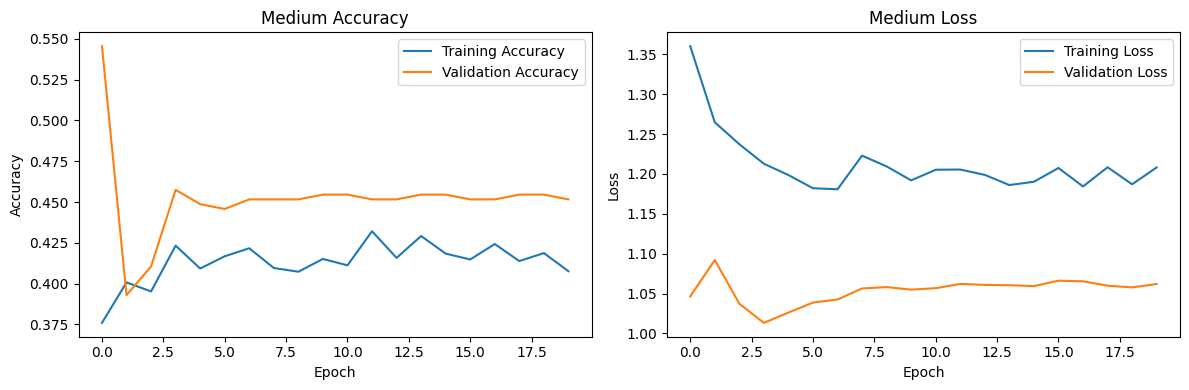

In [4]:
# #plotting
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(fine_tune_history.history["accuracy"], label="Fine-Tuning Training Accuracy")
# plt.plot(fine_tune_history.history["val_accuracy"], label="Fine-Tuning Validation Accuracy")
# plt.title("Fine-Tuning Medium Accuracy")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(fine_tune_history.history["loss"], label="Fine-Tuning Training Loss")
# plt.plot(fine_tune_history.history["val_loss"], label="Fine-Tuning Validation Loss")
# plt.title("Fine-Tuning Medium Loss")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()

# plt.tight_layout()
# plt.show()

#plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Medium Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Medium Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()